In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import json
from geopy.geocoders import DataBC
from geopandas.tools import sjoin
import csv
from IPython.display import HTML, IFrame
from IPython.lib.pretty import pprint
from folium import plugins
from folium.plugins import MarkerCluster
from shapely.ops import nearest_points

%matplotlib inline
IFrame_width_px = 1024
IFrame_heigth_px = 600

In [2]:
#Import Sales Data

data=pd.read_csv("/home/mehmetali/Downloads/ProjectREV/csv/VancouverRE_SoldData.csv")

In [3]:
#Format Sales Data

data=data.drop_duplicates()
data.reset_index(inplace=True)
data['index']=data.index
data['Address'].describe()

count                             5072
unique                            5044
top       1208 HOMER STREET, Vancouver
freq                                 3
Name: Address, dtype: object

In [4]:
data.sample(2)

,index,Type,Type2,Price,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address
2818,2818,Apartment,1 Storey,"$1,255,000",24/10/2018,2,2,"1,022",NaN,New,75,1602,1661,"QUEBEC STREET,",Vancouver,"1602, 1661 QUEBEC STREET, Vancouver"
4014,4014,Apartment,Corner Unit,"$510,000",16/01/2019,1,1,596,NaN,37,13,201,659,"E 8TH AVENUE,",Vancouver,"201, 659 E 8TH AVENUE, Vancouver"


In [5]:
#Transform Data for DataBC lat/long Data

geolocator=DataBC(timeout=5)

address, (latitude, longitude) = geolocator.geocode(data['Address'][2404])

print(address)

UNIT 302 -- 2220 Kingsway, Vancouver, BC


In [6]:
#df=pd.DataFrame(['index','Address','latitude','longitude'])


#Pull lat/long Data from DataBC

#for index, row in data.iterrows():
 #   location=geolocator.geocode(row['Address'])
  #  df=df.append({'index':row['index'],'Address':location.address,'latitude':location.latitude,'longitude':location.longitude}, ignore_index=True)
    
#df=df[['index','Address','latitude','longitude']]


#lat/long Sanity Test

#df[['latitude', 'longitude']].mean()

In [7]:
#Plot Sales Data

#df.plot.scatter('longitude', 'latitude', s=11, figsize=(4,4))

In [8]:
#Clean Sales Data

#df=df[df['latitude'] < 49.3 ]
#df=df[df['latitude'] > 49.2 ]
#df=df[df['longitude'] < -123 ]

#df.plot.scatter('longitude', 'latitude', s=11, figsize=(4,4))

In [9]:
#Create "geometry", (POINT) Column

#from shapely.geometry import Point
#geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

#Coordinate reference system : WGS84

#crs = {'init': 'epsg:4326'}


#Create Geographic df

#df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

#df.to_csv('/home/mehmetali/Downloads/ProjectREV/VancouverRE_SoldData_DataBC.csv')

df=pd.read_csv('/home/mehmetali/Downloads/ProjectREV/csv/VancouverRE_SoldData_DataBC.csv')

df.sample(2)

,Unnamed: 0,index,Address,latitude,longitude,geometry
4829,4903,4899.0,"McGill St, Vancouver, BC",49.288712,-123.046186,POINT (-123.0461856 49.2887119)
3657,3679,3675.0,"UNIT 409 -- 937 W 14th Ave, Vancouver, BC",49.258946,-123.125337,POINT (-123.1253365 49.2589461)


In [10]:
df.describe()

,Unnamed: 0,index,latitude,longitude
count,4998.000000,4998.000000,4998.000000,4998.000000
mean,2517.851941,2513.851941,49.257347,-123.109562
std,1460.601009,1460.601009,0.022897,0.041586
min,4.000000,0.000000,49.203551,-123.224164
25%,1253.250000,1249.250000,49.240723,-123.133600
50%,2509.500000,2505.500000,49.263424,-123.114990
75%,3770.750000,3766.750000,49.275723,-123.086053
max,5075.000000,5071.000000,49.294099,-123.023025


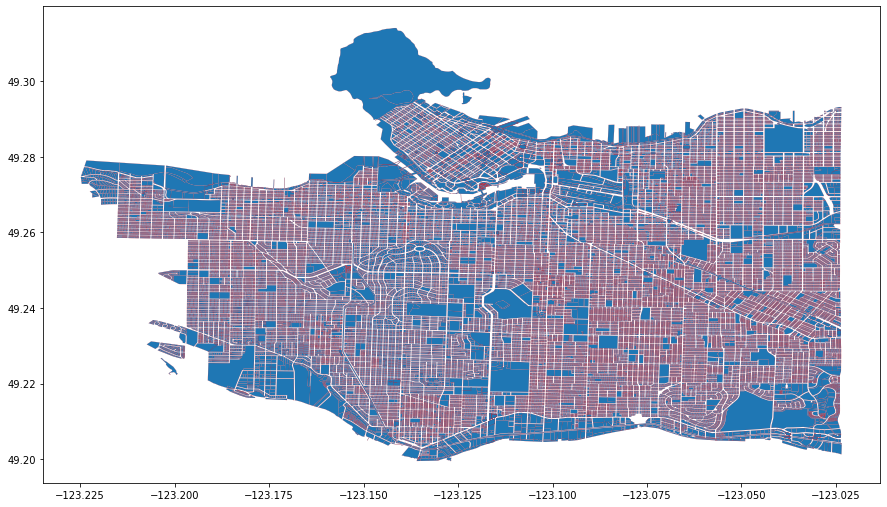

In [11]:
#Import Parcel Data for the Vancouver Region & Boundaries of Vancouver + Create Van City Parcel Data 

VanCityParsel=gpd.read_file('/home/mehmetali/Downloads/ProjectREV/geojson/PMBC_PARCEL_FABRIC_POLY_SVW.geojson')

VanCityBound=gpd.read_file('/home/mehmetali/Downloads/ProjectREV/geojson/VanCity.geojson')

VanCity = sjoin(VanCityParsel, VanCityBound, op='within')

VanCity.plot(figsize=(15,15), linewidth=0.1, edgecolor='red');

In [12]:
#Sold Properties Data for Vancouver

VanCityProp=df.merge(data, on='index', how='left')

VanCityProp = VanCityProp.rename(columns={'index':'prop_id','Address_x':'Address DataBC','Address_y':'Address SoldData'})

In [13]:
VanCityProp.sample(2)

,Unnamed: 0,prop_id,Address DataBC,latitude,longitude,geometry,Type,Type2,Price,Sold Date,...,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address SoldData
2672,2685,2681.0,"UNIT 605 -- 1788 Ontario St, Vancouver, BC",49.269533,-123.104236,POINT (-123.1042358 49.2695331),Apartment,"1 Storey, Corner Unit","$850,000",24/01/2019,...,2,813,NaN,3,79,605,1788,"ONTARIO STREET,",Vancouver,"605, 1788 ONTARIO STREET, Vancouver"
3177,3196,3192.0,"UNIT 1702 -- 1281 W Cordova St, Vancouver, BC",49.290099,-123.123199,POINT (-123.1231987 49.2900991),Apartment,Corner Unit,"$5,125,000",14/09/2018,...,2,"1,814",NaN,13,32,1702,1281,"W CORDOVA STREET,",Vancouver,"1702, 1281 W CORDOVA STREET, Vancouver"


In [14]:
VanCityProp.describe()

,Unnamed: 0,prop_id,latitude,longitude,Acres,DoM
count,4998.000000,4998.000000,4998.000000,4998.000000,1364.000000,4998.000000
mean,2517.851941,2513.851941,49.257347,-123.109562,0.143189,30.275910
std,1460.601009,1460.601009,0.022897,0.041586,0.329233,42.595304
min,4.000000,0.000000,49.203551,-123.224164,0.010000,0.000000
25%,1253.250000,1249.250000,49.240723,-123.133600,0.090000,7.000000
50%,2509.500000,2505.500000,49.263424,-123.114990,0.100000,15.000000
75%,3770.750000,3766.750000,49.275723,-123.086053,0.140000,38.000000
max,5075.000000,5071.000000,49.294099,-123.023025,9.000000,645.000000


In [15]:
list(VanCityProp)

['Unnamed: 0',
 'prop_id',
 'Address DataBC',
 'latitude',
 'longitude',
 'geometry',
 'Type',
 'Type2',
 'Price',
 'Sold Date',
 'Bedrooms',
 'Bathrooms',
 'Area',
 'Acres',
 'Age',
 'DoM',
 'Unit No',
 'Building No',
 'Street',
 'City',
 'Address SoldData']

In [16]:
VanCityProp= VanCityProp[[
    'prop_id',
    'Address DataBC',
    'latitude',
    'longitude',
    'geometry',
    'Type',
    'Type2',
    'Price',
    'Sold Date',
    'Bedrooms',
    'Bathrooms',
    'Area',
    'Acres',
    'Age',
    'DoM',
    'Unit No',
    'Building No',
    'Street',
    'City',
    'Address SoldData']]

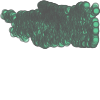

In [17]:
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

crs = {'init': 'epsg:4326'}

VanCityProp = gpd.GeoDataFrame(VanCityProp, crs=crs, geometry=geometry)

unary_union = VanCityProp.unary_union
unary_union

In [18]:
VanCity= VanCity[['PARCEL_FABRIC_POLY_ID','PARCEL_NAME','PLAN_NUMBER','PIN','PID','PID_NUMBER','PARCEL_STATUS','PARCEL_CLASS','OWNER_TYPE','PARCEL_START_DATE','MUNICIPALITY','REGIONAL_DISTRICT','WHEN_UPDATED','FEATURE_AREA_SQM','FEATURE_LENGTH_M','OBJECTID','SE_ANNO_CAD_DATA','geometry']]
VanCity.sample(2)

,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,PARCEL_CLASS,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA,geometry
50902,1400984,011327260,VAP4757,NaN,011327260,11327260.0,Active,Subdivision,Private,20021213,"Vancouver, City of",Metro Vancouver Regional District,20190112,392.6403,95.4713,110417147,None,POLYGON ((-123.1098420164232 49.22814257717466...
44645,1385572,007940408,VAP347,NaN,007940408,7940408.0,Active,Subdivision,Private,20090408,"Vancouver, City of",Metro Vancouver Regional District,20190112,347.5981,89.2390,110401735,None,POLYGON ((-123.0652985483026 49.27170308309503...


In [19]:
#Merge Sold Data & VanCity Parcel data

VanCityProp2 = sjoin(VanCityProp, VanCity, how='left')

print(VanCityProp2['geometry'][0])

POINT (-123.1980102 49.2292154)


In [20]:
VanCityProp2.describe()

,prop_id,latitude,longitude,Acres,DoM,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,6371.000000,6371.000000,6371.000000,1364.000000,6371.000000,4936.000000,4.936000e+03,9.000000e+00,2.281000e+03,4936.000000,4936.000000,4.936000e+03
mean,2649.517815,49.256759,-123.107382,0.143189,30.398368,59925.752634,1.442298e+06,1.825083e+07,1.798373e+07,3777.492734,230.268110,1.104585e+08
std,1459.887962,0.024787,0.040200,0.329233,40.834769,26231.915514,6.575540e+04,8.934539e+06,8.831557e+06,4546.699010,139.055806,6.575540e+04
min,0.000000,49.203551,-123.224164,0.010000,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,34.450100,38.687100,1.090310e+08
25%,1383.500000,49.238448,-123.128315,0.090000,7.000000,40913.000000,1.425861e+06,1.239535e+07,1.108224e+07,635.470625,110.579425,1.104420e+08
50%,2684.000000,49.264188,-123.114015,0.100000,16.000000,60088.000000,1.447468e+06,1.985518e+07,1.441502e+07,2219.473450,195.037100,1.104636e+08
75%,3899.500000,49.277858,-123.088799,0.140000,38.000000,76896.000000,1.465256e+06,2.038378e+07,2.798662e+07,4661.458200,300.490100,1.104814e+08
max,5071.000000,49.294099,-123.023025,9.000000,645.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,42042.272500,1037.174400,1.106086e+08


In [21]:
VanCityProp2NaN=VanCityProp2[VanCityProp2['OBJECTID'].isnull()]
VanCityProp2NaN.describe()

,prop_id,latitude,longitude,Acres,DoM,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,1435.000000,1435.000000,1435.000000,50.00000,1435.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3095.758885,49.260682,-123.105743,0.21640,25.282927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1477.995288,0.022220,0.035242,0.35482,30.061596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,49.204315,-123.224164,0.01000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1934.500000,49.249203,-123.125660,0.09000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3490.000000,49.265829,-123.112900,0.14000,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4379.500000,49.278105,-123.094972,0.19500,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5070.000000,49.293220,-123.023025,2.30000,249.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
VanCityProp2NotNaN=VanCityProp2[VanCityProp2['OBJECTID'].notnull()]
VanCityProp2NotNaN.describe()

,prop_id,latitude,longitude,Acres,DoM,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,4936.000000,4936.000000,4936.000000,1314.000000,4936.000000,4936.000000,4.936000e+03,9.000000e+00,2.281000e+03,4936.000000,4936.000000,4.936000e+03
mean,2519.786062,49.255618,-123.107858,0.140403,31.885535,59925.752634,1.442298e+06,1.825083e+07,1.798373e+07,3777.492734,230.268110,1.104585e+08
std,1428.814093,0.025373,0.041522,0.328042,43.358182,26231.915514,6.575540e+04,8.934539e+06,8.831557e+06,4546.699010,139.055806,6.575540e+04
min,0.000000,49.203551,-123.221179,0.020000,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,34.450100,38.687100,1.090310e+08
25%,1277.000000,49.235660,-123.129534,0.090000,7.000000,40913.000000,1.425861e+06,1.239535e+07,1.108224e+07,635.470625,110.579425,1.104420e+08
50%,2459.000000,49.263117,-123.115026,0.100000,17.000000,60088.000000,1.447468e+06,1.985518e+07,1.441502e+07,2219.473450,195.037100,1.104636e+08
75%,3703.250000,49.277767,-123.086195,0.140000,40.250000,76896.000000,1.465256e+06,2.038378e+07,2.798662e+07,4661.458200,300.490100,1.104814e+08
max,5071.000000,49.294099,-123.024168,9.000000,645.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,42042.272500,1037.174400,1.106086e+08


In [23]:
VanCityProp2NaN= VanCityProp2NaN[[
    'prop_id',
    'Address DataBC',
    'latitude',
    'longitude',
    'geometry',
    'Type',
    'Type2',
    'Price',
    'Sold Date',
    'Bedrooms',
    'Bathrooms',
    'Area',
    'Acres',
    'Age',
    'DoM',
    'Unit No',
    'Building No',
    'Street',
    'City',
    'Address SoldData']]

VanCityProp2NaN.sample(2)

,prop_id,Address DataBC,latitude,longitude,geometry,Type,Type2,Price,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address SoldData
661,661.0,"E 8th Ave, Vancouver, BC",49.263263,-123.071269,POINT (-123.0712689 49.26326270000001),Apartment,Penthouse,"$500,000",28/11/2018,1,1,558,NaN,9,15,NaN,PH4,"E 8TH AVENUE,",Vancouver,"PH4 E 8TH AVENUE, Vancouver"
4865,4935.0,"109 W 7th Ave, Vancouver, BC",49.264740,-123.107166,POINT (-123.1071661 49.2647396),Apartment,Ground Level Unit,"$840,000",25/10/2018,2,2,"1,005",NaN,29,20,NaN,109,"W 7TH AVENUE,",Vancouver,"109 W 7TH AVENUE, Vancouver"


In [24]:
#Find NaN cells (after sjoin) with nearest_point

pts3 =VanCity.unary_union
VanCityProp2NaN2=pd.DataFrame
VanCityProp2NaN2=pd.DataFrame(columns=['prop_id', 'prop point'])

for i, row in VanCityProp2NaN.iterrows():
    VanCityProp2NaN2=VanCityProp2NaN2.append({'prop_id':row['prop_id'],'prop point':row['geometry'],'geometry':nearest_points(row.geometry, pts3)[1]}, ignore_index=True)

VanCityProp2NaN2=VanCityProp2NaN2[['prop_id','geometry']]
VanCityProp2NaN2.sample(2)

,prop_id,geometry
467,2414.0,POINT (-123.1303763923656 49.27581170119799)
1160,4520.0,POINT (-123.1207620225374 49.27558871085596)


In [25]:
VanCityProp2NaN2 = gpd.GeoDataFrame(VanCityProp2NaN2, crs=crs, geometry='geometry')
VanCityProp2NaN3 = sjoin(VanCityProp2NaN2, VanCity, how='left')
VanCityProp2NaN3NaN=VanCityProp2NaN3[VanCityProp2NaN3['OBJECTID'].isnull()]
VanCityProp2NaN3NotNaN=VanCityProp2NaN3[VanCityProp2NaN3['OBJECTID'].notnull()]
VanCityProp2NaN3NotNaN.describe()


,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,964.000000,964.000000,9.640000e+02,6.000000e+00,4.930000e+02,964.000000,964.000000,9.640000e+02
mean,3307.585062,56898.521784,1.420380e+06,1.344033e+07,1.518894e+07,5563.117210,253.525714,1.104365e+08
std,1411.062421,23807.724740,1.558958e+05,8.602629e+05,7.856771e+06,23618.126696,238.819016,1.558958e+05
min,1.000000,3061.000000,1.950300e+04,1.186715e+07,2.512602e+06,23.517300,33.574300,1.090357e+08
25%,2281.250000,40776.000000,1.411494e+06,1.356386e+07,8.740992e+06,580.686425,106.633100,1.104277e+08
50%,3747.500000,60063.500000,1.430162e+06,1.356386e+07,1.422556e+07,2564.873500,218.438300,1.104463e+08
75%,4471.250000,73203.000000,1.461489e+06,1.356386e+07,1.803895e+07,5633.916000,346.649275,1.104777e+08
max,5070.000000,110290.000000,1.590838e+06,1.451937e+07,3.071218e+07,493917.209900,3997.926900,1.106070e+08


In [26]:
VanCityProp2NaN3NaN.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,600.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2857.851667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1492.563401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1652.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3024.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,5062.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
list(VanCityProp2NaN3NaN)

['prop_id',
 'geometry',
 'index_right',
 'PARCEL_FABRIC_POLY_ID',
 'PARCEL_NAME',
 'PLAN_NUMBER',
 'PIN',
 'PID',
 'PID_NUMBER',
 'PARCEL_STATUS',
 'PARCEL_CLASS',
 'OWNER_TYPE',
 'PARCEL_START_DATE',
 'MUNICIPALITY',
 'REGIONAL_DISTRICT',
 'WHEN_UPDATED',
 'FEATURE_AREA_SQM',
 'FEATURE_LENGTH_M',
 'OBJECTID',
 'SE_ANNO_CAD_DATA']

In [28]:
VanCity2=VanCity
VanCity2['centroid']=VanCity.centroid
list(VanCity2)

['PARCEL_FABRIC_POLY_ID',
 'PARCEL_NAME',
 'PLAN_NUMBER',
 'PIN',
 'PID',
 'PID_NUMBER',
 'PARCEL_STATUS',
 'PARCEL_CLASS',
 'OWNER_TYPE',
 'PARCEL_START_DATE',
 'MUNICIPALITY',
 'REGIONAL_DISTRICT',
 'WHEN_UPDATED',
 'FEATURE_AREA_SQM',
 'FEATURE_LENGTH_M',
 'OBJECTID',
 'SE_ANNO_CAD_DATA',
 'geometry',
 'centroid']

In [29]:
VanCity2=VanCity2[['PARCEL_FABRIC_POLY_ID',
                   'PARCEL_NAME',
                   'PLAN_NUMBER',
                   'PIN',
                   'PID',
                   'PID_NUMBER',
                   'PARCEL_STATUS',
                   'PARCEL_CLASS',
                   'OWNER_TYPE',
                   'PARCEL_START_DATE',
                   'MUNICIPALITY',
                   'REGIONAL_DISTRICT',
                   'WHEN_UPDATED',
                   'FEATURE_AREA_SQM',
                   'FEATURE_LENGTH_M',
                   'OBJECTID',
                   'SE_ANNO_CAD_DATA',
                   'centroid']]

In [30]:
VanCity2 = VanCity2.rename(columns={'centroid':'geometry'})
VanCity2 = gpd.GeoDataFrame(VanCity2, crs=crs, geometry='geometry')
pts4 =VanCity2.unary_union

In [31]:
VanCityProp2NaN3NaN2=pd.DataFrame
VanCityProp2NaN3NaN2=pd.DataFrame(columns=['prop_id', 'prop point'])

for i, row in VanCityProp2NaN3NaN.iterrows():
    VanCityProp2NaN3NaN2=VanCityProp2NaN3NaN2.append({'prop_id':row['prop_id'],'prop point':row['geometry'],'geometry':nearest_points(row.geometry, pts4)[1]}, ignore_index=True)

VanCityProp2NaN3NaN2=VanCityProp2NaN3NaN2[['prop_id','geometry']]
VanCityProp2NaN3NaN2 = gpd.GeoDataFrame(VanCityProp2NaN3NaN2, crs=crs, geometry='geometry')
VanCityProp2NaN3NaN3 = sjoin(VanCityProp2NaN3NaN2, VanCity, how='left')
VanCityProp2NaN3NaN3.sample(2)

,prop_id,geometry,index_right,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,...,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA,centroid
341,3450.0,POINT (-123.1222012355522 49.27686533717718),72988,1462832,013704974,VAP1444,NaN,013704974,13704974.0,Active,...,Private,20120911,"Vancouver, City of",Metro Vancouver Regional District,20190112,103.0932,42.8082,110478995,None,POINT (-123.1222012355522 49.27686533717718)
338,3443.0,POINT (-123.1222012355522 49.27686533717718),72988,1462832,013704974,VAP1444,NaN,013704974,13704974.0,Active,...,Private,20120911,"Vancouver, City of",Metro Vancouver Regional District,20190112,103.0932,42.8082,110478995,None,POINT (-123.1222012355522 49.27686533717718)


In [32]:
VanCityProp2NaN3NaN3NotNaN=VanCityProp2NaN3NaN3[VanCityProp2NaN3NaN3['OBJECTID'].notnull()]
VanCityProp2NaN3NaN3NaN=VanCityProp2NaN3NaN3[VanCityProp2NaN3NaN3['OBJECTID'].isnull()]
VanCityProp2NaN3NaN3NaN.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
VanCityProp2NotNaN = VanCityProp2NotNaN[['prop_id',
                                         'geometry',
                                         'index_right',
                                         'PARCEL_FABRIC_POLY_ID',
                                         'PARCEL_NAME',
                                         'PLAN_NUMBER',
                                         'PIN',
                                         'PID',
                                         'PID_NUMBER',
                                         'PARCEL_STATUS',
                                         'PARCEL_CLASS',
                                         'OWNER_TYPE',
                                         'PARCEL_START_DATE',
                                         'MUNICIPALITY',
                                         'REGIONAL_DISTRICT',
                                         'WHEN_UPDATED',
                                         'FEATURE_AREA_SQM',
                                         'FEATURE_LENGTH_M',
                                         'OBJECTID',
                                         'SE_ANNO_CAD_DATA']]

In [34]:
df_new = pd.concat([VanCityProp2NotNaN, VanCityProp2NaN3NotNaN])
df_new.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,5900.000000,5900.000000,5.900000e+03,1.500000e+01,2.774000e+03,5900.000000,5900.000000,5.900000e+03
mean,2648.504407,59431.133898,1.438717e+06,1.632663e+07,1.748704e+07,4069.245615,234.068166,1.104549e+08
std,1455.260814,25873.668642,8.746638e+04,7.199282e+06,8.730628e+06,10430.363313,159.879066,8.746638e+04
min,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,23.517300,33.574300,1.090310e+08
25%,1382.750000,40913.000000,1.425661e+06,1.297961e+07,1.088012e+07,622.306100,110.043575,1.104418e+08
50%,2687.000000,60087.000000,1.441611e+06,1.356386e+07,1.439380e+07,2229.318400,195.096400,1.104578e+08
75%,3877.500000,76624.000000,1.465241e+06,2.011491e+07,2.796229e+07,4942.804300,310.384300,1.104814e+08
max,5071.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,493917.209900,3997.926900,1.106086e+08


In [35]:
VanCityProp2NaN3NaN3NotNaN=VanCityProp2NaN3NaN3NotNaN[['prop_id',
                                                       'geometry',
                                                       'index_right',
                                                       'PARCEL_FABRIC_POLY_ID',
                                                       'PARCEL_NAME',
                                                       'PLAN_NUMBER',
                                                       'PIN',
                                                       'PID',
                                                       'PID_NUMBER',
                                                       'PARCEL_STATUS',
                                                       'PARCEL_CLASS',
                                                       'OWNER_TYPE',
                                                       'PARCEL_START_DATE',
                                                       'MUNICIPALITY',
                                                       'REGIONAL_DISTRICT',
                                                       'WHEN_UPDATED',
                                                       'FEATURE_AREA_SQM',
                                                       'FEATURE_LENGTH_M',
                                                       'OBJECTID',
                                                       'SE_ANNO_CAD_DATA']]

In [36]:
df_new2 = pd.concat([df_new, VanCityProp2NaN3NaN3NotNaN])
df_new2.describe()

,prop_id,index_right,PARCEL_FABRIC_POLY_ID,PIN,PID_NUMBER,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID
count,6701.000000,6701.000000,6.701000e+03,1.600000e+01,3.193000e+03,6701.000000,6701.000000,6.701000e+03
mean,2692.264289,58908.661245,1.440054e+06,1.604792e+07,1.744054e+07,3947.557545,231.734586,1.104562e+08
std,1457.601262,25763.758872,8.370710e+04,7.043949e+06,8.810431e+06,9867.498798,159.151078,8.370710e+04
min,0.000000,1081.000000,1.484900e+04,7.118291e+06,2.409381e+06,2.003000,6.831100,1.090310e+08
25%,1439.000000,40911.000000,1.425652e+06,1.226333e+07,1.085582e+07,583.480500,108.664200,1.104418e+08
50%,2729.000000,60063.000000,1.440491e+06,1.356386e+07,1.451042e+07,2204.973400,195.037100,1.104567e+08
75%,3962.000000,75950.000000,1.465248e+06,1.998505e+07,2.798658e+07,4942.804300,310.384300,1.104814e+08
max,5071.000000,111083.000000,1.592420e+06,3.677046e+07,3.074982e+07,493917.209900,3997.926900,1.106086e+08


In [37]:
df_new3=df_new2
df_new3=df_new3[['prop_id','OBJECTID']]
df_new3.sample(2)

,prop_id,OBJECTID
4821,4891.0,110481348.0
344,344.0,110455667.0


In [38]:
df_new3.describe()

,prop_id,OBJECTID
count,6701.000000,6.701000e+03
mean,2692.264289,1.104562e+08
std,1457.601262,8.370710e+04
min,0.000000,1.090310e+08
25%,1439.000000,1.104418e+08
50%,2729.000000,1.104567e+08
75%,3962.000000,1.104814e+08
max,5071.000000,1.106086e+08


In [39]:
df.sample(2)

,Unnamed: 0,index,Address,latitude,longitude,geometry
279,283,279.0,"3408 W 32nd Ave, Vancouver, BC",49.243036,-123.18052,POINT (-123.1805199 49.2430362)
4698,4771,4767.0,"York Ave, Vancouver, BC",49.271707,-123.15620,POINT (-123.1561999 49.271707)


In [40]:
df_new4=df_new3.merge(df, left_on='prop_id' , right_on='index', how='left')
df_new4.sample(2)

,prop_id,OBJECTID,Unnamed: 0,index,Address,latitude,longitude,geometry
5741,4631.0,110481398.0,4635,4631.0,"UNIT 2609 -- 233 Robson St, Vancouver, BC",49.278446,-123.115264,POINT (-123.1152644 49.2784459)
5808,4787.0,110481334.0,4791,4787.0,"202 E 8th Ave, Vancouver, BC",49.263653,-123.100060,POINT (-123.1000599 49.2636527)


In [41]:
df_new4.describe()

,prop_id,OBJECTID,Unnamed: 0,index,latitude,longitude
count,6701.000000,6.701000e+03,6701.000000,6701.000000,6701.000000,6701.000000
mean,2692.264289,1.104562e+08,2696.264289,2692.264289,49.256293,-123.107003
std,1457.601262,8.370710e+04,1457.601262,1457.601262,0.025270,0.039871
min,0.000000,1.090310e+08,4.000000,0.000000,49.203551,-123.224164
25%,1439.000000,1.104418e+08,1443.000000,1439.000000,49.237136,-123.127784
50%,2729.000000,1.104567e+08,2733.000000,2729.000000,49.264160,-123.114080
75%,3962.000000,1.104814e+08,3966.000000,3962.000000,49.277895,-123.088722
max,5071.000000,1.106086e+08,5075.000000,5071.000000,49.294099,-123.023025


In [42]:
#df_new5=df_new4.groupby('prop_id').mean()

df_new5=df_new4.drop_duplicates(['prop_id'], keep='last')
df_new5.describe()

,prop_id,OBJECTID,Unnamed: 0,index,latitude,longitude
count,4998.000000,4.998000e+03,4998.000000,4998.000000,4998.000000,4998.000000
mean,2513.851941,1.104440e+08,2517.851941,2513.851941,49.257347,-123.109562
std,1460.601009,9.150605e+04,1460.601009,1460.601009,0.022897,0.041586
min,0.000000,1.090310e+08,4.000000,0.000000,49.203551,-123.224164
25%,1249.250000,1.104306e+08,1253.250000,1249.250000,49.240723,-123.133600
50%,2505.500000,1.104452e+08,2509.500000,2505.500000,49.263424,-123.114990
75%,3766.750000,1.104768e+08,3770.750000,3766.750000,49.275723,-123.086053
max,5071.000000,1.106086e+08,5075.000000,5071.000000,49.294099,-123.023025


In [43]:
df_new5.sample(2)

,prop_id,OBJECTID,Unnamed: 0,index,Address,latitude,longitude,geometry
107,149.0,110469153.0,153,149.0,"1299 W 57th Ave, Vancouver, BC",49.219468,-123.133545,POINT (-123.1335448 49.2194678)
1415,1461.0,110480213.0,1465,1461.0,"5880 Crown St, Vancouver, BC",49.233032,-123.193428,POINT (-123.193428 49.2330324)


In [44]:
df_new6=df_new5
df_new6=df_new6[['prop_id','OBJECTID']]
df_new6.sample(2)

,prop_id,OBJECTID
2731,2752.0,110450012.0
5965,632.0,110442451.0


In [45]:
df_new7=df_new6.merge(data, left_on='prop_id' , right_on='index', how='left')
df_new7.sample(2)

,prop_id,OBJECTID,index,Type,Type2,Price,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address
4685,2889.0,110421167.0,2889,Apartment,Penthouse,"$2,500,000",24/06/2018,2,3,"1,576",NaN,4,13,NaN,1605,"E 1ST AVENUE,",Vancouver,"1605 E 1ST AVENUE, Vancouver"
1882,2339.0,110389107.0,2339,Apartment,"Corner Unit, End Unit","$519,500",09/06/2018,2,1,701,NaN,28,2,203,2295,"PANDORA STREET,",Vancouver,"203, 2295 PANDORA STREET, Vancouver"


In [46]:
df_new7=pd.read_csv("/home/mehmetali/Downloads/ProjectREV/csv/df_new7.csv")
df_new7.sample(2)

,Unnamed: 0,prop_id,OBJECTID,index,Type,Type2,Price,ppsqft,Sold Date,Bedrooms,Bathrooms,Area,Acres,Age,DoM,Unit No,Building No,Street,City,Address
4070,4070,4109,110386383,4109,Apartment,Inside Unit,"775,000",906,28/08/2018,2,2,855,NaN,28,28,NaN,601,"FRANCES STREET,",Vancouver,"601 FRANCES STREET, Vancouver"
1961,1961,2442,110426911,2442,House,3 Storey,"1,800,000",915,07/10/2018,4,2,"1,968",0.06,104,2,NaN,2148,"KITCHENER STREET,",Vancouver,"2148 KITCHENER STREET, Vancouver"


In [47]:
df_new8=df_new7
df_new8=df_new8[['OBJECTID','Type','ppsqft','Building No','Street']]

prop=df_new7
prop=prop[['OBJECTID','ppsqft']]
prop.sample(2)

,OBJECTID,ppsqft
4294,110425578,949
3349,110481747,981


In [48]:
prop=prop.groupby('OBJECTID').mean()
prop.sample(2)

,ppsqft
OBJECTID,
110418110,905.000000
110481502,1273.166667


In [49]:
prop.describe()

,ppsqft
count,2968.000000
mean,922.096855
std,369.009597
min,94.000000
25%,723.000000
50%,888.250000
75%,1057.000000
max,11667.000000


In [50]:
prop['ppsqft'].quantile(0.3)

760.0

In [51]:
from branca.colormap import linear

# OrRd colormap is kind of similar to tabelog score colors

colormap = linear.YlOrRd_09.scale(
    prop['ppsqft'].quantile(0.3),
    prop['ppsqft'].quantile(0.95))

colormap

In [52]:
#Apply colors on 'id's

colors = prop['ppsqft'].apply(colormap)

colors.sample(5)

OBJECTID
110450351    #fea847
110386887    #ffffcc
110493820    #ffffcc
110477448    #febf59
110461422    #ffefa5
Name: ppsqft, dtype: object

In [53]:
colorsDF=pd.DataFrame({'OBJECTID':colors.index, 'colors':colors.values})
colorsDF.sample(2)

,OBJECTID,colors
2280,110470717,#ffffcc
432,110399592,#fead4a


In [54]:
VanCity.sample(2)

,PARCEL_FABRIC_POLY_ID,PARCEL_NAME,PLAN_NUMBER,PIN,PID,PID_NUMBER,PARCEL_STATUS,PARCEL_CLASS,OWNER_TYPE,PARCEL_START_DATE,MUNICIPALITY,REGIONAL_DISTRICT,WHEN_UPDATED,FEATURE_AREA_SQM,FEATURE_LENGTH_M,OBJECTID,SE_ANNO_CAD_DATA,geometry,centroid
100774,1448500,013954822,VAP2238,NaN,013954822,13954822.0,Active,Subdivision,Private,20090818,"Vancouver, City of",Metro Vancouver Regional District,20190112,397.9454,93.1528,110464663,None,POLYGON ((-123.1309705648396 49.20631933501081...,POINT (-123.1307266586348 49.20636605077576)
55949,1438308,008361916,VAP10043,NaN,008361916,8361916.0,Active,Subdivision,Private,20160201,"Vancouver, City of",Metro Vancouver Regional District,20190112,612.7067,106.5902,110454471,None,POLYGON ((-123.1191605426032 49.22520939981187...,POINT (-123.1192894258764 49.22504995761014)


In [55]:
VanCity4=VanCity
VanCity4=VanCity4[['OBJECTID','geometry']]

colorsDF2=VanCity4.merge(colorsDF, on='OBJECTID' , how='left')
colorsDF2=colorsDF2[['OBJECTID','colors']]
colorsDF2.sample(2)

,OBJECTID,colors
81553,110455908,NaN
11847,110437594,NaN


In [56]:
colorsDF2=colorsDF2.fillna('#ffffff')
colorsDF2.set_index('OBJECTID', inplace=True)
colorsDF2.sample(2)

,colors
OBJECTID,
110390768,#ffffff
110393371,#ffffcc


In [57]:
colorsDF3 = pd.Series(colorsDF2['colors'], index=colorsDF2.index)
grouped = colorsDF3.groupby(level=0)
colorsDF4=grouped.first()
colorsDF4.loc[110479082]

'#ffffff'

In [58]:
colorsDF4.sample(2)

OBJECTID
110426083    #ffffff
110387101    #ffffff
Name: colors, dtype: object

In [59]:
colorsDF4.count()

101712

In [60]:
df_new8.sample(2)

,OBJECTID,Type,ppsqft,Building No,Street
339,110455526,House,794,W 18TH,"AVENUE,"
906,110414843,House,1072,E,"27TH AVENUE,"


In [61]:
VanCity4.count()

OBJECTID    101712
geometry    101712
dtype: int64

In [62]:
VanCity5=pd.merge(VanCity4,df_new8, on='OBJECTID', how='left')
VanCity5=VanCity5.drop_duplicates(['OBJECTID'], keep='last')
VanCity5.count()

OBJECTID       101712
geometry       101712
Type             2968
ppsqft           2968
Building No      2968
Street           2957
dtype: int64

In [63]:
VanCity5.set_index('OBJECTID', inplace=True)
VanCity5.sample(2)

,geometry,Type,ppsqft,Building No,Street
OBJECTID,,,,,
110442215,POLYGON ((-123.0562901697896 49.21888458611956...,NaN,NaN,NaN,NaN
110473490,POLYGON ((-123.2092040806506 49.26859686913182...,NaN,NaN,NaN,NaN


In [64]:
yaletownco=(49.2763217, -123.1209558)

n = folium.Map(location=yaletownco, #tiles='Stamen Toner',
               zoom_start=16)

folium.GeoJson(
    VanCity5.to_json(),
    style_function=lambda feature: {
        'fillColor': colorsDF4.loc[int(feature['id'])], #my_color_function(feature), #colorsDF3.loc[feature['id']],
        'color': 'black',
        'weight': 0, #parsel lines
        #'dashArray': '1, 1',
        'fillOpacity': 0.8
        #'highlight': True
    },
    tooltip=folium.features.GeoJsonTooltip(
            fields=['Type','ppsqft'],
            aliases=['Type:','Price per sqft:'],
        localize=True
    )
).add_to(n)

marker_cluster = MarkerCluster().add_to(n)

In [65]:
#Create clustered points on top of the map

for idx, row in VanCityProp.iterrows():
    # Get lat and lon of points
    lon = row['geometry'].x
    lat = row['geometry'].y

    # Get address informatin
    address = row['Address DataBC']

    # Add marker to the marker cluster
    folium.Marker(location=[lat, lon], icon=None, popup=address).add_to(marker_cluster)

#folium.LayerControl().add_to(n)
n.add_child(colormap)
n.save('/home/mehmetali/Downloads/ProjectREV/html/Vancouver.html')
#folium.LayerControl().add_to(m)

In [66]:
IFrame(src='http://localhost:8888/notebooks/Downloads/ProjectREV/html/Vancouver.html', width=IFrame_width_px, height=IFrame_heigth_px)